## SỬ DỤNG THUẬT TOÁN CÂY QUYẾT ĐỊNH ĐỂ DỰ ĐOÁN BỆNH TIM (Created By Đình Sơn)
Nguồn dữ liệu về bệnh tim được lấy ở đây
(https://www.kaggle.com/fedesoriano/heart-failure-prediction). \



**Trong trang này em sẽ clean data và hiển thì biểu đồ từng thuộc tính 1 cách trực quan trc khi áp dụng mô hình học máy**



In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đọc file dữ liệu và hiển thị các phần tử đầu trong ds dataset

df_heart = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Heart-Disease-Prediction-main/data/heart.csv")
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Như mọi người thấy

**Age:** age of the patient (years) \
**Sex:** sex of the patient (M: Male, F: Female) \
**ChestPainType:** chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic) \
**RestingBP:** resting blood pressure (mm Hg) \
**Cholesterol:** serum cholesterol (mm/dl) \
**FastingBS:** fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise) \
**RestingECG:** resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria) \
**MaxHR:** maximum heart rate achieved (Numeric value between 60 and 202) \
**ExerciseAngina:** exercise-induced angina (Y: Yes, N: No) \
**Oldpeak:** oldpeak = ST (Numeric value measured in depression) \
**ST_Slope:** the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping) \
**HeartDisease:** output class (1: heart disease, 0: Normal) \

In [ ]:
#Để hình dung ra 1 cách tổng quát thì em sẽ hiển thỉ 1 số thông tin về dataset
print(df_heart.info())
df_heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


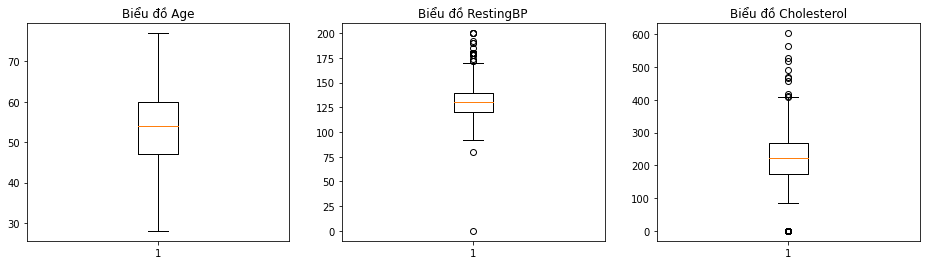

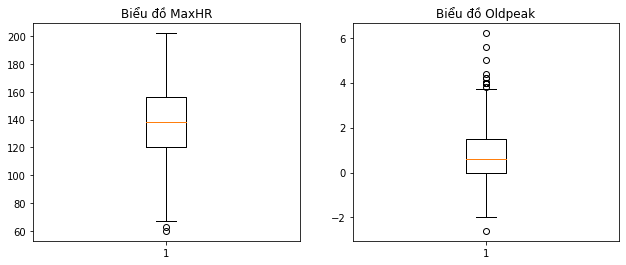

In [ ]:
# Hiển thị các thuộc tính bằng biểu đồ nén để hình dung ra giá trị thuộc tính trc khi clean data

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0 
for feature in ['Age', 'RestingBP', 'Cholesterol']:
    axs[count].boxplot(df_heart[feature])
    axs[count].set_title(('Biểu đồ ' + feature))
    count += 1

count = 0
for feature in ['MaxHR', 'Oldpeak']:
    axs2[count].boxplot(df_heart[feature])
    axs2[count].set_title(('Biểu đồ ' +  feature))
    count += 1
    
plt.show()

In [ ]:
# Ở trên, ta có thể quan sát thấy rằng đối với một số tính có  các giá trị ngoại vi outliner
# Các giá trị thuộc tính này  có thể do lỗi, ngoai vi lên ta cần cleandata
# Có thể có nhiều ngoại lệ hơn nhưng cá nhân tôi không quen với các phép đo như vậy để có thể nhận ra chúng

print('Data size before cleaning: ', len(df_heart))
df_heart_clean = df_heart[(df_heart['Cholesterol'] > 5) &
                         (df_heart['RestingBP'] > 10)]
print('Data size after cleaning: ', len(df_heart_clean))

Data size before cleaning:  918
Data size after cleaning:  746


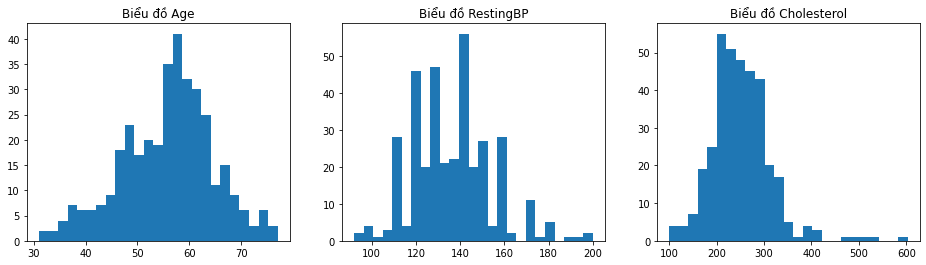

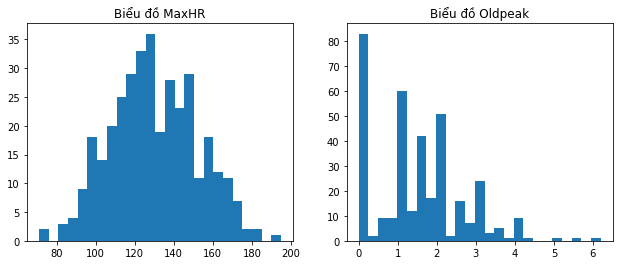

In [ ]:
#Hiển thị các thuộc tính qua biểu đồ history
patients = df_heart_clean[df_heart_clean['HeartDisease'] == 1]


fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0 
for feature in ['Age', 'RestingBP', 'Cholesterol']:
    axs[count].hist(patients[feature], bins=25)
    axs[count].set_title(('Biểu đồ ' +  feature ))
    count += 1

count = 0
for feature in ['MaxHR', 'Oldpeak']:
    axs2[count].hist(patients[feature], bins=25)
    axs2[count].set_title(('Biểu đồ ' +  feature ))
    count += 1
    
plt.show()

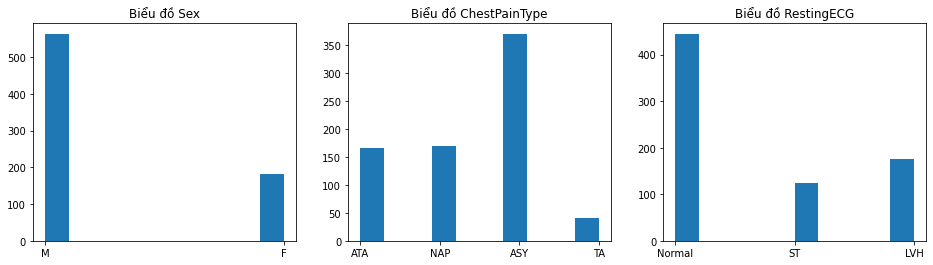

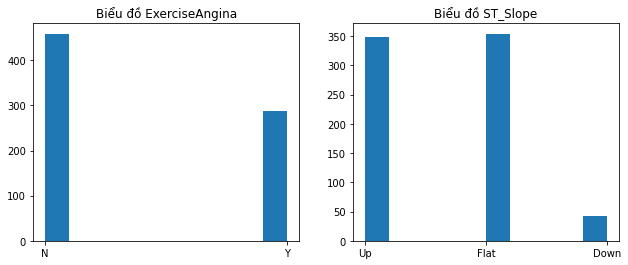

In [ ]:
# Hiện thị phân bố giá trị tập trung của các thuộc tính

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0 
for feature in ['Sex', 'ChestPainType', 'RestingECG']:
    axs[count].hist(df_heart_clean[feature])
    axs[count].set_title(('Biểu đồ ' +  feature))
    count += 1

count = 0
for feature in ['ExerciseAngina', 'ST_Slope']:
    axs2[count].hist(df_heart_clean[feature])
    axs2[count].set_title(('Biểu đồ ' +  feature))
    count += 1
    
plt.show()

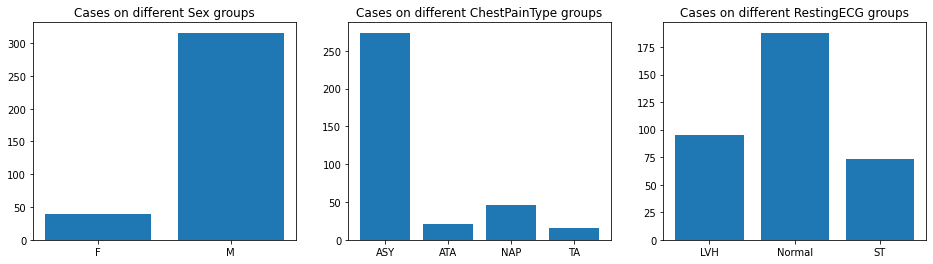

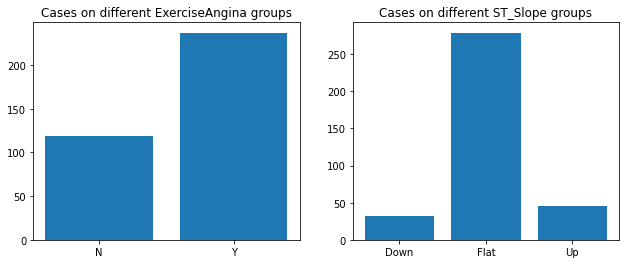

In [ ]:
# Ta sẽ hình dung các trường hợp bệnh tim cho từng đặc điểm phân loại của tập dữ liệu

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0 
for feature in ['Sex', 'ChestPainType', 'RestingECG']:
    patients = df_heart_clean.groupby([feature]).sum()
    
    axs[count].bar(patients.index, height=patients['HeartDisease'])
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['ExerciseAngina', 'ST_Slope']:
    patients = df_heart_clean.groupby([feature]).sum()
    
    axs2[count].bar(patients.index, height=patients['HeartDisease'])
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1
    
plt.show()

In [ ]:
# xuất file dữ liệu sau khi đã clean
df_heart_clean.to_csv('/content/drive/My Drive/Colab Notebooks/Heart-Disease-Prediction-main/data/data_clean.csv', index=False);